In [1]:
source(paste0(file.path("/","mnt","hadoop_tmp","working","Rcode"),"/",list.files(file.path("/","mnt","hadoop_tmp","working","Rcode"),pattern = "_proteome.r$")))



Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: httr

Loading required package: stringr

Loading required package: pbapply

Loading required package: reshape2


Attaching package: ‘reshape2’


The following objects are masked from ‘package:data.table’:

    dcast, melt




In [2]:
getwd()
path <- file.path("/","mnt","hadoop_tmp","working","2022 YEO","2023_BV2_siIft88_CD81IP_ExoRBR_220818")
rawPD<-list.files(path, pattern = "_Proteins.txt$")
#infoPD<-list.files(path, pattern = "_InputFiles.txt$")
print(rawPD)
#path1 <- system.file("extdata", package="wrProteo")
#fiNaPd <- "pxd001819_PD24_Proteins.txt.gz"

[1] "/mnt/hadoop_tmp/working/2022 YEO/2023_BV2_siIft88_CD81IP_ExoRBR_220818"

[1] "230316_AnovaAbunda_RBR_220818B_siI_Exo_CD81IP_Proteins.txt"


In [3]:
datafromPD<-lapply(rawPD, function(file){
  return(fread(paste0(path,"/",file)))
})



require(stringr)
for(i in seq_len(length(datafromPD))){
  colnames(datafromPD[[i]])<-str_replace_all(colnames(datafromPD[[i]]),"[ ]",".")
  colnames(datafromPD[[i]])<-str_replace_all(colnames(datafromPD[[i]]),"[-]","_")
}

counts<-lapply(datafromPD, function(data){
  cts<-data %>% base::subset(select = c("Accession",grep("^Abundances.Normalized.", colnames(data), value=TRUE))) 
  return(cts)
})

In [4]:
k = 1 # select number number from "print(rawPD)"
colnames(counts[[k]])

[1] "Accession"                                     
 [2] "Abundances.Normalized.F1.Sample.Con"           
 [3] "Abundances.Normalized.F2.Sample.Con"           
 [4] "Abundances.Normalized.F3.Sample.Con"           
 [5] "Abundances.Normalized.F4.Sample.Con"           
 [6] "Abundances.Normalized.F5.Sample.Con_Abeta"     
 [7] "Abundances.Normalized.F6.Sample.Con_Abeta"     
 [8] "Abundances.Normalized.F7.Sample.Con_Abeta"     
 [9] "Abundances.Normalized.F8.Sample.Con_Abeta"     
[10] "Abundances.Normalized.F9.Sample.siIft88"       
[11] "Abundances.Normalized.F10.Sample.siIft88"      
[12] "Abundances.Normalized.F11.Sample.siIft88"      
[13] "Abundances.Normalized.F12.Sample.siIft88"      
[14] "Abundances.Normalized.F13.Sample.siIft88_Abeta"
[15] "Abundances.Normalized.F14.Sample.siIft88_Abeta"
[16] "Abundances.Normalized.F15.Sample.siIft88_Abeta"
[17] "Abundances.Normalized.F16.Sample.siIft88_Abeta"

In [5]:
############# Modify variables based on "colnames(counts[[k]])"
y.count<-list("Control"=subset(counts[[k]], select = c("Accession",grep("_Con$", colnames(counts[[k]]), value=TRUE))),
              "Con+Abeta"=subset(counts[[k]], select = c("Accession",grep("Con_Abeta$", colnames(counts[[k]]), value=TRUE))),
              "siIft88"=subset(counts[[k]], select = c("Accession",grep("_siIft88", colnames(counts[[k]]), value=TRUE))),
              "siIft88+Abeta"=subset(counts[[k]], select = c("Accession",grep("_siIft88_Abeta$", colnames(counts[[k]]), value=TRUE))))

Loading required package: ggVennDiagram



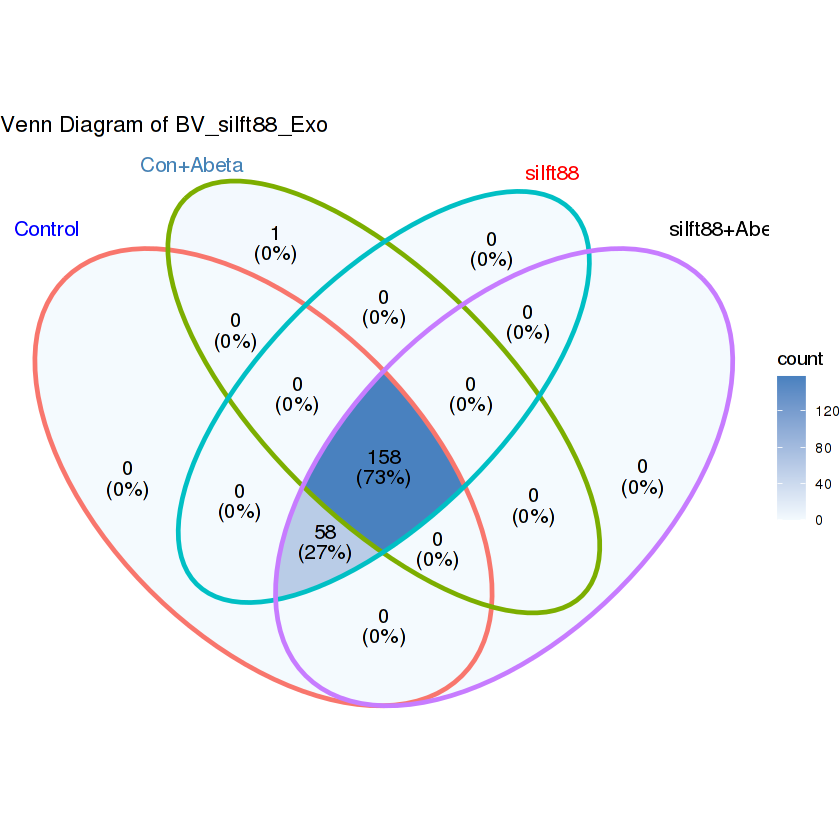

In [6]:
y <- list("Control"= y.count[[1]]$Accession[unique(c(unlist(apply(y.count[[1]], 2, function(x) which(!is.na(x)))[-1])))],
          "Con+Abeta"= y.count[[2]]$Accession[unique(c(unlist(apply(y.count[[2]], 2, function(x) which(!is.na(x)))[-1])))],
          "siIft88"= y.count[[3]]$Accession[unique(c(unlist(apply(y.count[[3]], 2, function(x) which(!is.na(x)))[-1])))],
           "siIft88+Abeta"= y.count[[4]]$Accession[unique(c(unlist(apply(y.count[[4]], 2, function(x) which(!is.na(x)))[-1])))])

require(ggVennDiagram)
p<-ggVennDiagram(y, label_alpha = 0, 
          color =  c("A" = "blue","B" ="steelblue","C" = "red", "'D" = "black") ,
          set_color = c("A" = "blue","B" ="steelblue", "C" = "red", "D" = "black")) + 
#                                                                      scale_fill_distiller(palette = "RdBu")+
    scale_fill_gradient(low = "#F4FAFE", high = "#4981BF")              +
    ggtitle("Venn Diagram of BV_siIft88_Exo")
print(p)
                                                                     
ggsave(paste0(path,"/results/Figure_vennALL.pdf"), p, width =5, height =5, units = "in", device = "pdf", dpi = 600)

In [7]:
############# Modify variables based on "colnames(counts[[k]])"
y.count<-list("Con+Abeta"=subset(counts[[k]], select = c("Accession",grep("Con_Abeta$", colnames(counts[[k]]), value=TRUE))),
              "siIft88+Abeta"=subset(counts[[k]], select = c("Accession",grep("_siIft88_Abeta$", colnames(counts[[k]]), value=TRUE))))

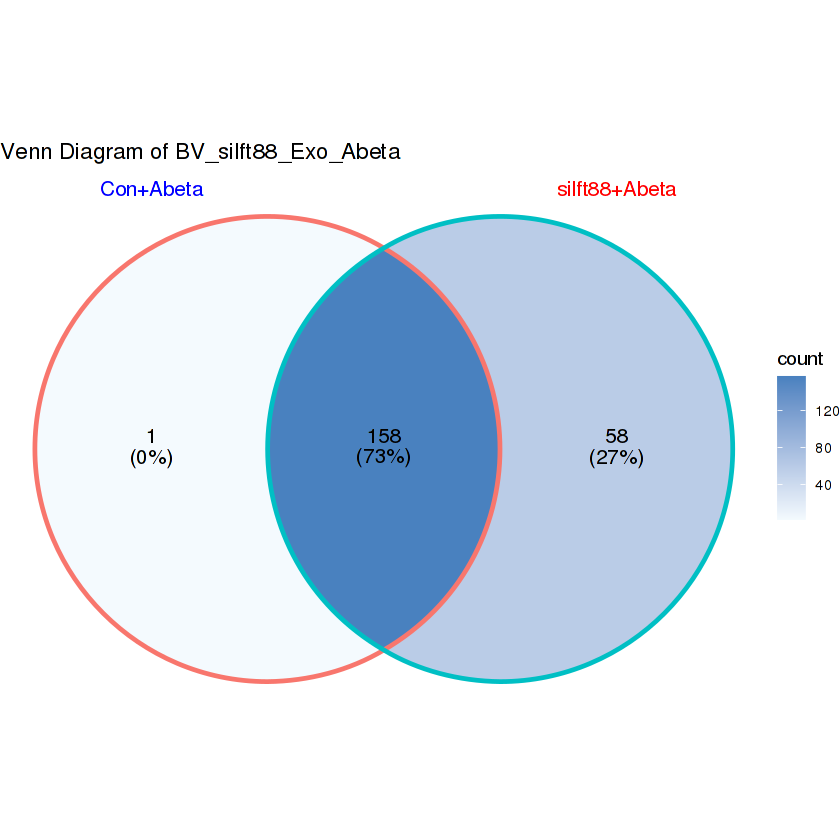

In [8]:
y <- list("Con+Abeta"= y.count[[1]]$Accession[unique(c(unlist(apply(y.count[[1]], 2, function(x) which(!is.na(x)))[-1])))],
          "siIft88+Abeta"= y.count[[2]]$Accession[unique(c(unlist(apply(y.count[[2]], 2, function(x) which(!is.na(x)))[-1])))])

require(ggVennDiagram)
p<-ggVennDiagram(y, label_alpha = 0, 
          color =  c("A" = "blue","B" ="red") ,
          set_color = c("A" = "blue","B" ="red")) + 
#                                                                      scale_fill_distiller(palette = "RdBu")+
    scale_fill_gradient(low = "#F4FAFE", high = "#4981BF")              +
    ggtitle("Venn Diagram of BV_siIft88_Exo_Abeta")
print(p)
                                                                     
ggsave(paste0(path,"/results/Figure_vennAbeta.pdf"), p, width =5, height =5, units = "in", device = "pdf", dpi = 600)

In [9]:
resultUNIPROT <- pbapply::pblapply(datafromPD[[k]]$Accession,function(ids){ #[-grep("ProteinCenter:sp_incl_isoforms",datafromPD$Accession)]
    data <- uniprot_mapping(ids)
    content(data, as= "text", encoding = 'UTF-8')
    res<-unlist(str_split(unlist(str_split(unlist(str_split(content(data, as= "text", encoding = 'UTF-8'),"\\t")),"\\n"))[4]," "))[1]
    return(res)
  })
  
  results_from_uniprot <- data.frame('Accession' = datafromPD[[k]]$Accession,  #[-grep("ProteinCenter:sp_incl_isoforms",datafromPD$Accession)]
                                     'Gene.names' = unlist(resultUNIPROT))
  require(stringi)
  # str_sub(datafromPD[[k]]$Description[1], #[-grep("ProteinCenter:sp_incl_isoforms",datafromPD$Accession)]
  #         str_locate(datafromPD[[k]]$Description[1],pattern = "GN=")[2]+1, #[-grep("ProteinCenter:sp_incl_isoforms",datafromPD$Accession)]
  #         str_locate(datafromPD[[k]]$Description[1],pattern = "PE=")[1]-2) #[-grep("ProteinCenter:sp_incl_isoforms",datafromPD$Accession)]
  # seq_len(length(dataPD$Description))
  result<-lapply(datafromPD[[k]]$Description, function(desc){ #[-grep("ProteinCenter:sp_incl_isoforms",datafromPD$Accession)]
    # str_sub(grep("GN=",unlist(str_split(desc, " ")), value = TRUE),start = 4L)
    str_sub(desc, 
            str_locate(desc,pattern = "GN=")[2]+1,
            str_locate(desc,pattern = "PE=")[1]-2)
  })
  
  result<-make.unique(unlist(result))
  
  results_from_datasheet <- data.frame('Protein.IDs' = datafromPD[[k]]$"Accession",  'Gene.names' = result) #[-grep("ProteinCenter:sp_incl_isoforms",datafromPD$Accession)]
  results_from_uniprot <- na.omit(results_from_uniprot)
  results_from_uniprot$Gene.names[which(results_from_uniprot$Gene.names=="")] <- result[which(datafromPD[[k]]$"Accession" %in% results_from_uniprot$Accession[which(results_from_uniprot$Gene.names=="")])]
  
  dat<-merge(counts[[k]], results_from_uniprot, by = "Accession")
  
  data_unique <- make_unique(dat, "Gene.names", "Accession", delim = ";")

  |::::::::::::::::::::::::::::::::::::::::::::::::::| 100%


Loading required package: stringi



In [12]:
############# Part 2. Not imputed
data <-  merge(datafromPD[[k]], results_from_uniprot, by = "Accession")

data.merged_neo <- subset(data, select=c("Gene.names","Accession",grep("^Abundance.Ratio.log2.|^Abundance.Ratio.Weight.|^Abundance.Ratio.Adj.P_Value",colnames(data), value = TRUE)))

colnames(data.merged_neo)

[1] "Gene.names"                                          
 [2] "Accession"                                           
 [3] "Abundance.Ratio.log2.Con_Abeta..Con"                 
 [4] "Abundance.Ratio.log2.siIft88..Con"                   
 [5] "Abundance.Ratio.log2.siIft88_Abeta..Con_Abeta"       
 [6] "Abundance.Ratio.log2.siIft88_Abeta..siIft88"         
 [7] "Abundance.Ratio.Adj.P_Value.Con_Abeta..Con"          
 [8] "Abundance.Ratio.Adj.P_Value.siIft88..Con"            
 [9] "Abundance.Ratio.Adj.P_Value.siIft88_Abeta..Con_Abeta"
[10] "Abundance.Ratio.Adj.P_Value.siIft88_Abeta..siIft88"

In [45]:
objDat <- subset(data.merged_neo, select=c("Gene.names","Accession",grep("siIft88_Abeta..Con_Abeta$",colnames(data.merged_neo), value = TRUE)))

colnames(data)




[1] "Accession"                                           
 [2] "Checked"                                             
 [3] "Protein.FDR.Confidence.Combined"                     
 [4] "Master"                                              
 [5] "Description"                                         
 [6] "Exp.q_value.Combined"                                
 [7] "Sum.PEP.Score"                                       
 [8] "Coverage.in.Percent"                                 
 [9] "Number.of.Peptides"                                  
[10] "Number.of.PSMs"                                      
[11] "Number.of.Unique.Peptides"                           
[12] "Number.of.AAs"                                       
[13] "MW.in.kDa"                                           
[14] "calc.pI"                                             
[15] "Score.Sequest.HT.Sequest.HT"                         
[16] "Number.of.Peptides.by.Search.Engine.Sequest.HT"      
[17] "Biological.Process"                                  
[18] "Cellular.Component"                                  
[19] "Molecular.Function"                                  
[20] "Pfam.IDs"                                            
[21] "Entrez.Gene.ID"                                      
[22] "Gene.Symbol"                                         
[23] "Gene.ID"                                             
[24] "Ensembl.Gene.ID"                                     
[25] "WikiPathways"                                        
[26] "Reactome.Pathways"                                   
[27] "Number.of.Protein.Pathway.Groups"                    
[28] "Number.of.Razor.Peptides"                            
[29] "Abundance.Ratio.Con_Abeta..Con"                      
[30] "Abundance.Ratio.siIft88..Con"                        
[31] "Abundance.Ratio.siIft88_Abeta..Con_Abeta"            
[32] "Abundance.Ratio.siIft88_Abeta..siIft88"              
[33] "Abundance.Ratio.log2.Con_Abeta..Con"                 
[34] "Abundance.Ratio.log2.siIft88..Con"                   
[35] "Abundance.Ratio.log2.siIft88_Abeta..Con_Abeta"       
[36] "Abundance.Ratio.log2.siIft88_Abeta..siIft88"         
[37] "Abundance.Ratio.P_Value.Con_Abeta..Con"              
[38] "Abundance.Ratio.P_Value.siIft88..Con"                
[39] "Abundance.Ratio.P_Value.siIft88_Abeta..Con_Abeta"    
[40] "Abundance.Ratio.P_Value.siIft88_Abeta..siIft88"      
[41] "Abundance.Ratio.Adj.P_Value.Con_Abeta..Con"          
[42] "Abundance.Ratio.Adj.P_Value.siIft88..Con"            
[43] "Abundance.Ratio.Adj.P_Value.siIft88_Abeta..Con_Abeta"
[44] "Abundance.Ratio.Adj.P_Value.siIft88_Abeta..siIft88"  
[45] "Abundance.F1.Sample.Con"                             
[46] "Abundance.F2.Sample.Con"                             
[47] "Abundance.F3.Sample.Con"                             
[48] "Abundance.F4.Sample.Con"                             
[49] "Abundance.F5.Sample.Con_Abeta"                       
[50] "Abundance.F6.Sample.Con_Abeta"                       
[51] "Abundance.F7.Sample.Con_Abeta"                       
[52] "Abundance.F8.Sample.Con_Abeta"                       
[53] "Abundance.F9.Sample.siIft88"                         
[54] "Abundance.F10.Sample.siIft88"                        
[55] "Abundance.F11.Sample.siIft88"                        
[56] "Abundance.F12.Sample.siIft88"                        
[57] "Abundance.F13.Sample.siIft88_Abeta"                  
[58] "Abundance.F14.Sample.siIft88_Abeta"                  
[59] "Abundance.F15.Sample.siIft88_Abeta"                  
[60] "Abundance.F16.Sample.siIft88_Abeta"                  
[61] "Abundances.Normalized.F1.Sample.Con"                 
[62] "Abundances.Normalized.F2.Sample.Con"                 
[63] "Abundances.Normalized.F3.Sample.Con"                 
[64] "Abundances.Normalized.F4.Sample.Con"                 
[65] "Abundances.Normalized.F5.Sample.Con_Abeta"           
[66] "Abundances.Normalized.F6.Sample.Con_Abeta"           
[67] "Abundances.Normalized.F7.Sample.Con

In [33]:
data_export <- subset(data, select=c("Gene.names","Accession",grep("^Abundance.Ratio.log2.|^Abundance.Ratio.P_Value|^Abundance.Ratio.Adj.P_Value",colnames(data), value = TRUE))) 
data_exports <-subset(data_export, select=c("Gene.names","Accession",grep("siIft88_Abeta..Con_Abeta$",colnames(data_export), value = TRUE)))

require(xlsx)
write.xlsx(data_exports, paste0(path,"/results/Figure7f_BVsiIft88_CD81IP_Exosome.xlsx"))

In [46]:
colnames(objDat)<- c('Gene.names','Accession','Abundance.Ratio.log2','Abundance.Ratio.P_Value')

insGenes <- objDat %>% dplyr::filter(Abundance.Ratio.log2 > 0.25 & Abundance.Ratio.P_Value < 0.05) %>% pull(Gene.names)
insGenes.n <- objDat %>% dplyr::filter(Abundance.Ratio.log2 < -0.25 & Abundance.Ratio.P_Value < 0.05) %>% pull(Gene.names)

In [41]:
na.omit(insGenes) %>% length()
na.omit(insGenes.n) %>% length()

[1] 76

[1] 13

In [15]:
library(enrichR)
library(httr)
# Check available databases to perform enrichment (then choose one)
databases <- enrichR::listEnrichrDbs()$libraryName

# insGenes <- mg.subset.DE[[id]] %>% dplyr::filter(p_val < 0.01  & avg_log2FC < -0.25) %>% rownames()



Welcome to enrichR
Checking connection ... 

Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is Live!

WormEnrichr ... 
Connection is Live!

YeastEnrichr ... 
Connection is Live!

FishEnrichr ... 
Connection is Live!

OxEnrichr ... 
Connection is Live!



In [16]:
enrich_results <- enrichr(genes = insGenes, databases = grep("GO|Reactome|Wiki|KEGG",databases, value = TRUE)[c(28, 34, 36:38)])
enrich_results.n <- enrichr(genes = insGenes.n, databases = grep("GO|Reactome|Wiki|KEGG",databases, value = TRUE)[c(28, 34, 36:38)])

Uploading data to Enrichr... Done.
  Querying KEGG_2019_Mouse... Done.
  Querying Reactome_2022... Done.
  Querying GO_Biological_Process_2023... Done.
  Querying GO_Cellular_Component_2023... Done.
  Querying GO_Molecular_Function_2023... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying KEGG_2019_Mouse... Done.
  Querying Reactome_2022... Done.
  Querying GO_Biological_Process_2023... Done.
  Querying GO_Cellular_Component_2023... Done.
  Querying GO_Molecular_Function_2023... Done.
Parsing results... Done.


In [17]:
enrich_result.p <- rbind(cbind(enrich_results[[1]],"group"="KEGG"),
                         cbind(enrich_results[[2]],"group"="reactome"),
                         cbind(enrich_results[[3]],"group"="GO-BP"),
                         cbind(enrich_results[[4]],"group"="GO-CC")) %>% 
                        mutate("Genesize" = (str_split_i(Overlap, "\\/",1))) %>%
                        dplyr::filter(Genesize > 2 & P.value < 0.01)
                         #cbind(enrich_results[[5]][grep("phagocy|cili|Cili|Phagocy||lysosom|Lysosom|secre|Secre|exocy|Exocy|exosom|Exosom", enrich_results[[5]] %>% dplyr::filter(P.value <0.1)  %>% pull(Term)),],"group"="GO-MF")
enrich_result.p$Term

[1] "Proteasome"                                                                                            
  [2] "Phagosome"                                                                                             
  [3] "Epstein-Barr virus infection"                                                                          
  [4] "Legionellosis"                                                                                         
  [5] "Glycolysis / Gluconeogenesis"                                                                          
  [6] "Protein processing in endoplasmic reticulum"                                                           
  [7] "RNA transport"                                                                                         
  [8] "Gap junction"                                                                                          
  [9] "Focal adhesion"                                                                                        
 [10] "Selenoamino Acid Metabolism R-HSA-2408522"                                                             
 [11] "Regulation Of Expression Of SLITs And ROBOs R-HSA-9010553"                                             
 [12] "Metabolism Of Amino Acids And Derivatives R-HSA-71291"                                                 
 [13] "Signaling By ROBO Receptors R-HSA-376176"                                                              
 [14] "Metabolism Of RNA R-HSA-8953854"                                                                       
 [15] "Metabolism Of Proteins R-HSA-392499"                                                                   
 [16] "Translation R-HSA-72766"                                                                               
 [17] "Infectious Disease R-HSA-5663205"                                                                      
 [18] "Axon Guidance R-HSA-422475"                                                                            
 [19] "Nervous System Development R-HSA-9675108"                                                              
 [20] "Cellular Responses To Stress R-HSA-2262752"                                                            
 [21] "Cellular Responses To Stimuli R-HSA-8953897"                                                           
 [22] "Disease R-HSA-1643685"                                                                                 
 [23] "Formation Of Tubulin Folding Intermediates By CCT/TriC R-HSA-389960"                                   
 [24] "Folding Of Actin By CCT/TriC R-HSA-390450"                                                             
 [25] "Metabolism R-HSA-1430728"                                                                              
 [26] "Cooperation Of Prefoldin And TriC/CCT In Actin And Tubulin Folding R-HSA-389958"                       
 [27] "Developmental Biology R-HSA-1266738"                                                                   
 [28] "Prefoldin Mediated Transfer Of Substrate To CCT/TriC R-HSA-389957"                                     
 [29] "Ribosomal Scanning And Start Codon Recognition R-HSA-72702"                                            
 [30] "Translation Initiation Complex Formation R-HSA-72649"                                                  
 [31] "mRNA Activation Upon Binding Of Cap-Binding Complex And eIFs, Subsequent Binding To 43S R-HSA-72662"   
 [32] "Chaperonin-mediated Protein Folding R-HSA-390466"                                                      
 [33] "Cooperation Of PDCL (PhLP1) And TRiC/CCT In G-protein Beta Folding R-HSA-6814122"                      
 [34] "Association Of TriC/CCT With Target Proteins During Biosynthesis R-HSA-390471"                         
 [35] "Protein Folding R-HSA-391251"                                                                          
 [36] "BBSome-mediated Cargo-Targeting To Cilium R-HSA-5620922"                                               
 [37] 

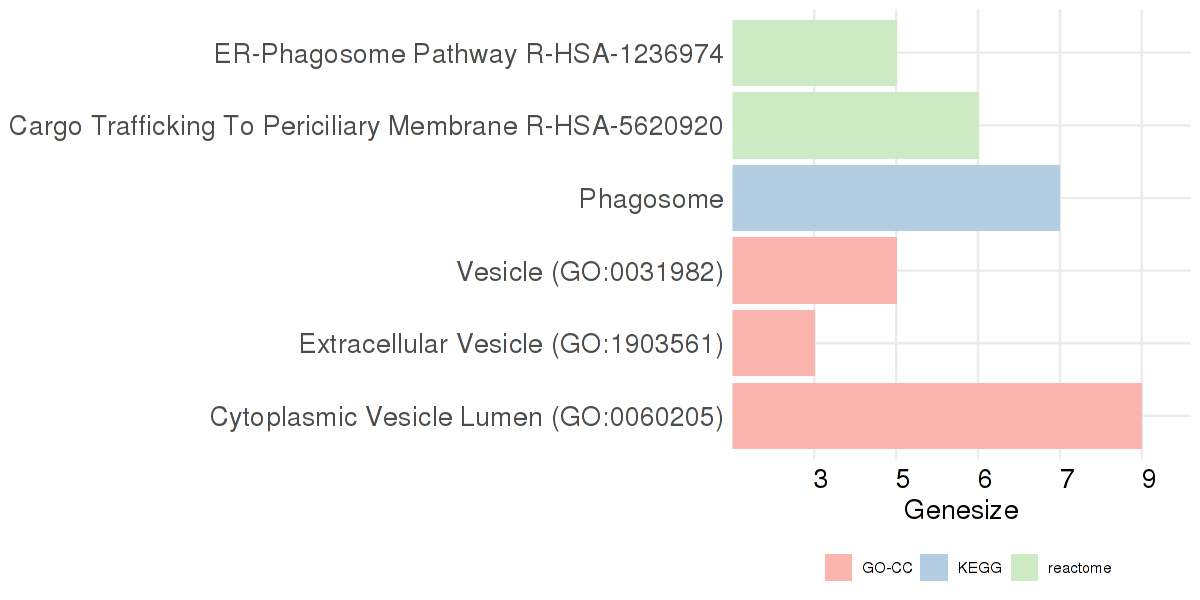

In [21]:
options(repr.plot.width=10, repr.plot.height=5)

require(forcats)

ggplot(enrich_result.p[grep("Phagosome|Cargo Trafficking To Periciliary Membrane|Extracellular Vesicle|Vesicle ",enrich_result.p$Term),], aes(Genesize, fct_reorder(Term, group),  fill=group)) + 
 geom_col(orientation='y') + 
    #scale_fill_grey(start = 0, end = .9)+
        # xlim(-2.5,2.5)+
    # scale_fill_continuous(low='red', high='blue', guide=guide_colorbar(reverse=TRUE)) + 
scale_fill_brewer(palette = "Pastel1")+
    theme_minimal() + ylab(NULL) +
     theme(legend.position="bottom",
                axis.text.x = element_text(size = 16, hjust = 0, colour = "black"),
                axis.text.y = element_text(size = 16),
                axis.title = element_text(size = 16),
                legend.title = element_blank(),
                legend.background = element_blank())

In [19]:
enrich_result.n <- rbind(cbind(enrich_results.n[[1]],"group"="KEGG"),
                         cbind(enrich_results.n[[2]],"group"="reactome"),
                         cbind(enrich_results.n[[3]],"group"="GO-BP"),
                         cbind(enrich_results.n[[4]],"group"="GO-CC")) %>% 
                        mutate("Genesize" = (str_split_i(Overlap, "\\/",1))) %>%
                        dplyr::filter(Genesize > 2 & P.value < 0.01)
                         #cbind(enrich_results[[5]][grep("phagocy|cili|Cili|Phagocy||lysosom|Lysosom|secre|Secre|exocy|Exocy|exosom|Exosom", enrich_results[[5]] %>% dplyr::filter(P.value <0.1)  %>% pull(Term)),],"group"="GO-MF")
enrich_result.n$Term

[1] "Post-translational Protein Phosphorylation R-HSA-8957275"     
 [2] "Regulation Of IGF Transport And Uptake By IGFBPs R-HSA-381426"
 [3] "Keratinization R-HSA-6805567"                                 
 [4] "Innate Immune System R-HSA-168249"                            
 [5] "Immune System R-HSA-168256"                                   
 [6] "Post-translational Protein Modification R-HSA-597592"         
 [7] "Infectious Disease R-HSA-5663205"                             
 [8] "Neutrophil Degranulation R-HSA-6798695"                       
 [9] "Disease R-HSA-1643685"                                        
[10] "Developmental Biology R-HSA-1266738"                          
[11] "Metabolism Of Proteins R-HSA-392499"                          
[12] "Intermediate Filament Organization (GO:0045109)"              
[13] "Supramolecular Fiber Organization (GO:0097435)"               
[14] "Secretory Granule Lumen (GO:0034774)"                         
[15] "Intracellular Organelle Lumen (GO:0070013)"                   
[16] "Endoplasmic Reticulum Lumen (GO:0005788)"                     
[17] "Collagen-Containing Extracellular Matrix (GO:0062023)"

In [34]:
require(xlsx)
write.xlsx(enrich_result.p, paste0(path,"/results/Figure7f_BVsiIft88_CD81IP_Exosome_pathwayP.xlsx"))
write.xlsx(enrich_result.n, paste0(path,"/results/Figure7f_BVsiIft88_CD81IP_Exosome_pathwayN.xlsx"))

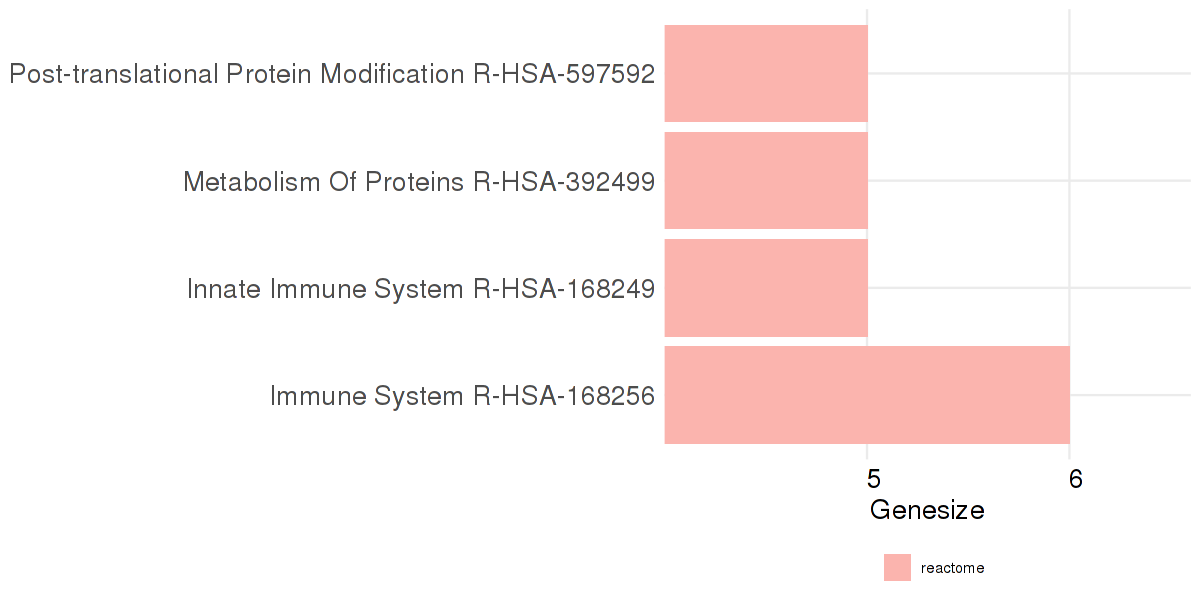

In [22]:
options(repr.plot.width=10, repr.plot.height=5)
require(forcats)

ggplot(enrich_result.n[grep("Immune System|Post-translational Protein Modification|Metabolism Of Proteins",enrich_result.n$Term),], aes(Genesize, fct_reorder(Term, group),  fill=group)) + 
 geom_col(orientation='y') + 
    #scale_fill_grey(start = 0, end = .9)+
        # xlim(-2.5,2.5)+
    # scale_fill_continuous(low='red', high='blue', guide=guide_colorbar(reverse=TRUE)) + 
scale_fill_brewer(palette = "Pastel1")+
    theme_minimal() + ylab(NULL) +
     theme(legend.position="bottom",
                axis.text.x = element_text(size = 16, hjust = 0, colour = "black"),
                axis.text.y = element_text(size = 16),
                axis.title = element_text(size = 16),
                legend.title = element_blank(),
                legend.background = element_blank())

In [23]:
enrich_result.p[grep("Phagosome|Cargo Trafficking To Periciliary Membrane|Extracellular Vesicle|Vesicle",enrich_result.p$Term),]
-log10(enrich_result.p$Adjusted.P.value[grep("Phagosome|Cargo Trafficking To Periciliary Membrane|Extracellular Vesicle|Vesicle",enrich_result.p$Term)])

enrich_result.n[grep("Immune System|Post-translational Protein Modification|Metabolism Of Proteins",enrich_result.n$Term),]
-log10(enrich_result.n$Adjusted.P.value[grep("Immune System|Post-translational Protein Modification|Metabolism Of Proteins",enrich_result.n$Term)])

,Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Odds.Ratio,Combined.Score,Genes,group,Genesize
,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>
2,Phagosome,7/180,5.513142e-06,1.635565e-04,0,0,11.582223,140.24191,COMP;TUBA1B;TUBB5;TUBB4B;CORO1A;ACTB;THBS4,KEGG,7
40,Cargo Trafficking To Periciliary Membrane R-HSA-5620920,6/50,3.426423e-08,3.124092e-07,0,0,38.727273,665.68943,CCT3;CCT2;TCP1;CCT8;CCT5;CCT4,reactome,6
129,ER-Phagosome Pathway R-HSA-1236974,5/89,2.243985e-05,7.246201e-05,0,0,16.633132,178.05223,PSMD12;PSMC5;PSMD11;PSMD2;PSMD3,reactome,5
272,Cytoplasmic Vesicle Lumen (GO:0060205),9/115,5.161843e-10,3.774598e-09,0,0,25.114334,537.05891,HSPA8;VCP;PSMD12;HSP90AB1;PKM;PSMD11;PSMD2;PSMD3;CCT8,GO-CC,9
281,Extracellular Vesicle (GO:1903561),3/60,1.544402e-03,6.230863e-03,0,0,14.323720,92.71914,PKM;CLTC;TUBB4B,GO-CC,3
282,Vesicle (GO:0031982),5/235,2.013564e-03,7.852900e-03,0,0,6.030006,37.43337,PKM;CLTC;TUBB4B;GAPDH;ACTB,GO-CC,5


[1] 3.786332 6.505276 4.139890 8.423129 2.205452 2.104970

,Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Odds.Ratio,Combined.Score,Genes,group,Genesize
,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>
4,Innate Immune System R-HSA-168249,5/1035,0.0003337172,0.01268125,0,0,11.503034,92.08428,C3;EEF1A1;PSMC4;KRT1;MASP1,reactome,5
5,Immune System R-HSA-168256,6/1943,0.0007837066,0.02233564,0,0,7.987315,57.12109,C3;EEF1A1;PSMC4;KRT1;FN1;MASP1,reactome,6
6,Post-translational Protein Modification R-HSA-597592,5/1383,0.0012629838,0.03199559,0,0,8.440221,56.33239,C3;EEF1A1;PSMC4;ALB;FN1,reactome,5
11,Metabolism Of Proteins R-HSA-392499,5/1890,0.0050459949,0.05143900,0,0,6.001989,31.74548,C3;EEF1A1;PSMC4;ALB;FN1,reactome,5


[1] 1.896838 1.651002 1.494910 1.288707

In [39]:
require(nichenetr)
group1_genes <- unique(unlist(str_split(enrich_result.p$Genes[grep("Phagosome",enrich_result.p$Term)],";"))) %>% convert_human_to_mouse_symbols()#c("Tuba1b","Psmd12","Psmc5","Psmd11")
group2_genes <- unique(unlist(str_split(enrich_result.p$Genes[grep("Cargo Trafficking To Periciliary Membrane",enrich_result.p$Term)],";"))) %>% convert_human_to_mouse_symbols()#c("Hspa8","Tuba1b","Psmd12","Psmc5")
group3_genes <- unique(unlist(str_split(enrich_result.p$Genes[grep("Extracellular Vesicle|Vesicle",enrich_result.p$Term)],";"))) %>% convert_human_to_mouse_symbols()#c("Rpl4","Eif4a1","Rps9","Rpl3")
group4_genes <- unique(unlist(str_split(enrich_result.n$Genes[grep("Immune System",enrich_result.n$Term)],";"))) %>% convert_human_to_mouse_symbols()#c("C3","App")
group5_genes <- unique(unlist(str_split(enrich_result.n$Genes[grep("Post-translational Protein Modification|Metabolism Of Proteins",enrich_result.n$Term)],";"))) %>% convert_human_to_mouse_symbols()#c("Dync1h1","Psmc4")

In [40]:
print(group1_genes)
print(group2_genes)
print(group3_genes)
print(group4_genes)
print(group5_genes)

    COMP   TUBA1B     <NA>   TUBB4B   CORO1A     ACTB    THBS4   PSMD12 
  "Comp" "Tuba1b"       NA "Tubb4b" "Coro1a"   "Actb"  "Thbs4" "Psmd12" 
   PSMC5   PSMD11    PSMD2    PSMD3 
 "Psmc5" "Psmd11"  "Psmd2"  "Psmd3" 
  CCT3   CCT2   TCP1   CCT8   CCT5   CCT4 
"Cct3" "Cct2" "Tcp1" "Cct8" "Cct5" "Cct4" 
     HSPA8        VCP     PSMD12   HSP90AB1        PKM     PSMD11      PSMD2 
   "Hspa8"      "Vcp"   "Psmd12" "Hsp90ab1"      "Pkm"   "Psmd11"    "Psmd2" 
     PSMD3       CCT8       CLTC     TUBB4B      GAPDH       ACTB 
   "Psmd3"     "Cct8"     "Cltc"   "Tubb4b"    "Gapdh"     "Actb" 
      C3   EEF1A1    PSMC4     KRT1    MASP1      FN1 
    "C3" "Eef1a1"  "Psmc4"   "Krt1"  "Masp1"    "Fn1" 
      C3   EEF1A1    PSMC4      ALB      FN1 
    "C3" "Eef1a1"  "Psmc4"    "Alb"    "Fn1" 


Warning message:
“Removed 58 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 58 rows containing missing values (`geom_point()`).”


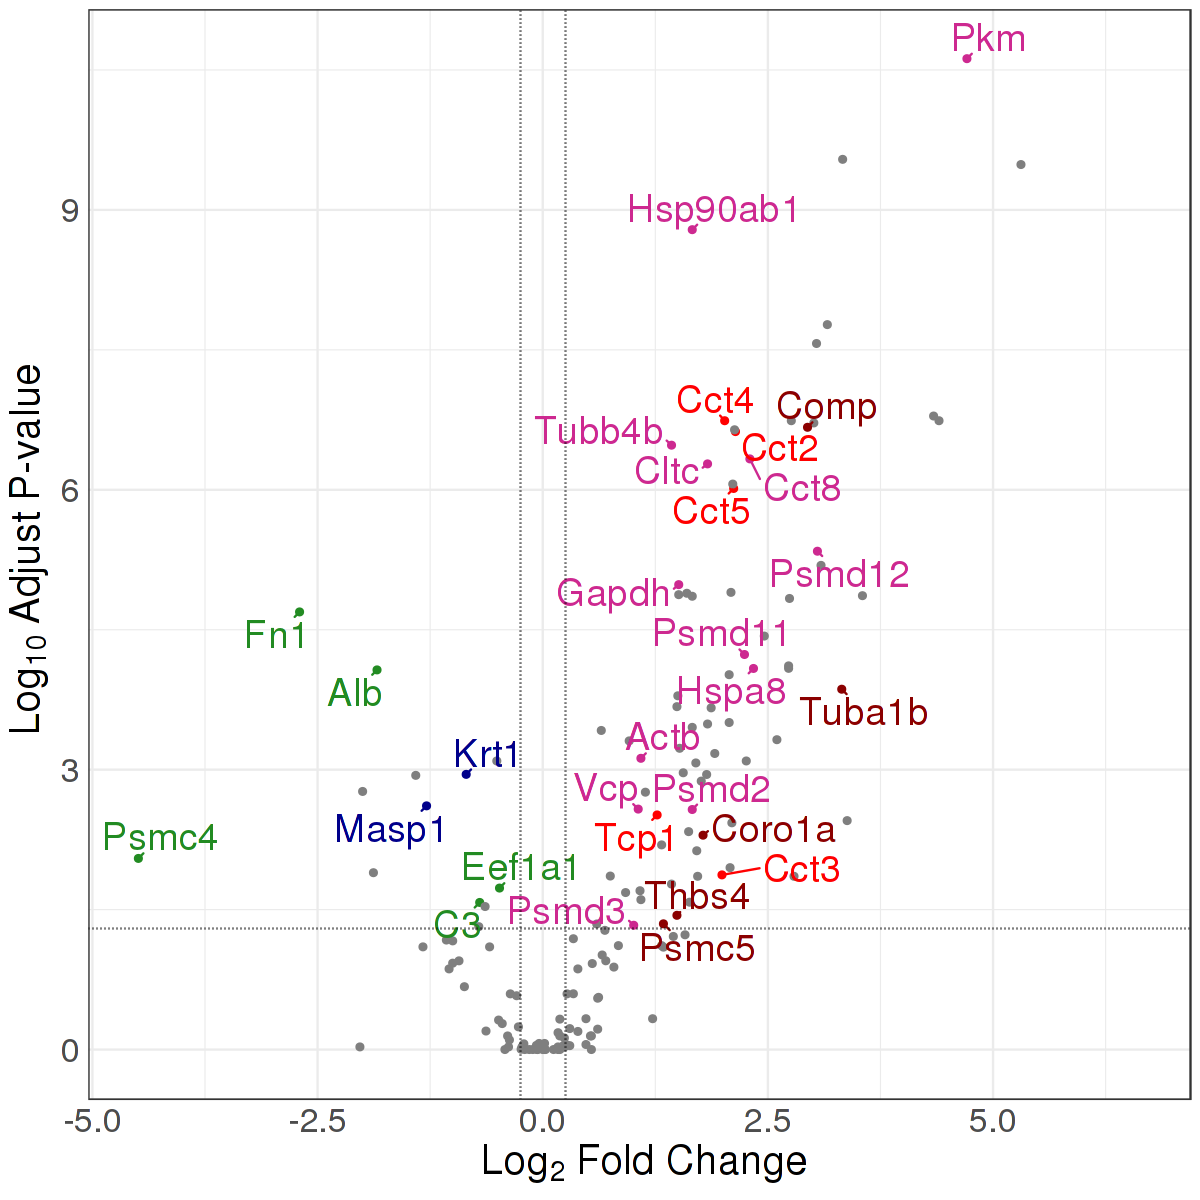

In [48]:
require(RColorBrewer)
# options(repr.plot.width = 16, repr.plot.height = 16)
keyvals.colour <- c()
keyvals.colour <- ifelse(objDat$Gene.names %in% group1_genes, 'darkred', 'grey50')
keyvals.colour[objDat$Gene.names %in% group2_genes] <- "red"
keyvals.colour[objDat$Gene.names %in% group3_genes] <- "maroon3"
keyvals.colour[objDat$Gene.names %in% group4_genes] <- "blue4"
keyvals.colour[objDat$Gene.names %in% group5_genes] <- "forestgreen"
keyvals.colour[is.na(keyvals.colour)] <- 'grey70'

names(keyvals.colour)[keyvals.colour == 'grey70'] <- 'ns'
names(keyvals.colour)[keyvals.colour == 'darkred'] <- 'Group 1'
names(keyvals.colour)[keyvals.colour == 'red'] <- 'Group 2'
names(keyvals.colour)[keyvals.colour == 'maroon3'] <- 'Group 3'
names(keyvals.colour)[keyvals.colour == 'blue4'] <- 'Group 4'
names(keyvals.colour)[keyvals.colour == 'forestgreen'] <- 'Group 5'



objDat$group <- names(keyvals.colour)
options(repr.plot.width=10, repr.plot.height=10)
require(RColorBrewer)
require(ggrepel)

p1<-ggplot(objDat, aes(x=Abundance.Ratio.log2, y=-log10(Abundance.Ratio.P_Value), color =group)) + 
  geom_point() +
  geom_text_repel(data = objDat[objDat$Gene.names %in% c(group1_genes,group2_genes,group3_genes,group4_genes,group5_genes)  ,],
                  aes(label=Gene.names), 
                  size = 8,
                  fontface = "italic", 
                  arrow = arrow(length = unit(0.0001, "npc")),
                  #colour = objDat$group,
                  max.overlaps = 100, min.segment.length=0.1)+
  xlab(bquote(~Log[2]~ 'Fold Change'))+
  ylab(bquote(~Log[10]~ 'Adjust P-value'))+
  scale_colour_manual(values = c("darkred","red","maroon3","blue4","forestgreen","grey70"))+ 
        geom_vline(xintercept=c(-0.25, 0.25), col="black", linetype="dotted") +
        geom_hline(yintercept=-log10(0.05), col="black", linetype="dotted") +
  theme_bw()+
  theme(legend.position = "none",  
        axis.title = element_text(size = 24, face = "bold"), 
        plot.title = element_blank(), 
        axis.text = element_text(size = 20),  
        axis.line = element_blank(), 
        axis.ticks = element_blank(),
        # legend.key.size = unit(1, 'in'),
         legend.title = element_blank(),
        legend.text = element_text(size=20)) 

print(p1)


ggsave(paste0(path,"/results/FigureS4B_BVsiIft88_CD81IP_Exo_Volcano plot22.pdf"), p1, width =7.5, height =7.5, units = "in", device = "pdf", dpi = 600)
